# Random Forest

In [10]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

merge = pd.read_csv('mergedML_detail.csv')


In [11]:
print(merge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32505 entries, 0 to 32504
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         32505 non-null  int64  
 1   time               32505 non-null  object 
 2   Day of week        32505 non-null  int64  
 3   Hours              32505 non-null  int64  
 4   DATE               32505 non-null  object 
 5   Week_num           32505 non-null  int64  
 6   temp               32505 non-null  float64
 7   humidity           32505 non-null  float64
 8   wind_speed         32505 non-null  float64
 9   total load actual  32505 non-null  float64
 10  Day_num            32505 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 2.7+ MB
None


In [17]:
from sklearn.ensemble import RandomForestRegressor

X = merge.iloc[: , [2,3,6,7,8,10]].values.astype('int64')
y = merge.iloc[: , 9].values.astype('int64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_pred= regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.astype('int64')

In [18]:
# remove -ve predicted value
df.drop(df[df['Predicted']<-1].index, axis=0,inplace=True)
df.drop(df[df['Actual']<-1].index, axis=0,inplace=True)
df.head(10)

,Actual,Predicted
0,29116,29673
1,20520,19977
2,36698,36664
3,31592,29579
4,25727,24849
5,25424,26239
6,34040,33856
7,23246,22890
8,33349,32704
9,31088,28040


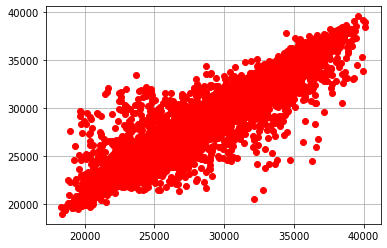

In [19]:
plt.plot(df['Actual'],df['Predicted'], 'ro')
plt.grid(True)

In [15]:
def mean_absolute_percentage_error(y_test, y_pred):
 y_test, y_pred = np.array(y_test), np.array(y_pred)
 return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [20]:
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Percentage Error: 4.090230867373626
Mean Absolute Error: 1129.920869097062
Mean Squared Error: 3130346.506226073
Root Mean Squared Error: 1769.2785270346988


4.09% is the best MAPE result by using 'day of week', 'hour', 'nth of day in a year', 'temperature', 'humidity' and 'wind_speed' as the feature.